## Second-Order Runge-Kutta

$$\begin{align*}
k_1 &= hf(x,t) \\ 
k_2 &= hf\left(x + \frac{1}{2}k_1, t + \frac{1}{2}h\right) \\ 
x(t+h) &= x(t) + k_2
\end{align*}$$
solves:
$$ \frac{\text{d}x}{\text{d} t} = f(x,t)$$ 

Solve the differential equation: 
$$ \frac{\text{d}x}{\text{d} t} = -x^3 + \sin t $$
with initial condition $x(0) = 0$

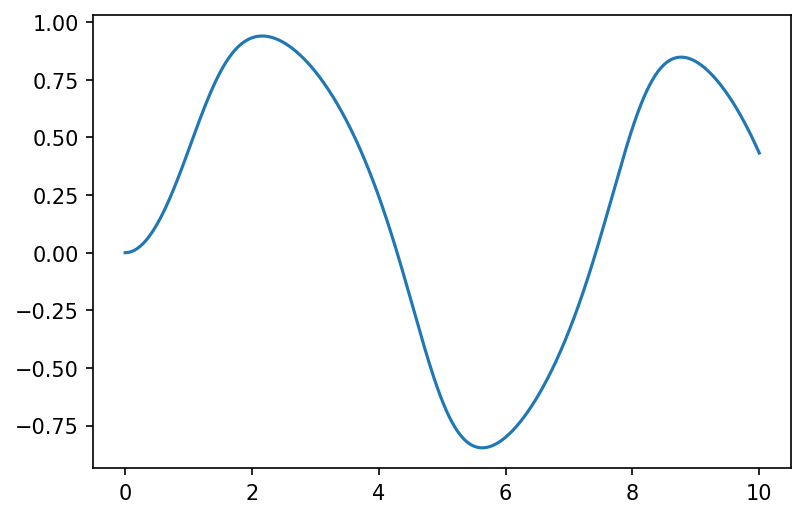

In [88]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt 
def rk2(f, x0, a, b, N=1000):
    ''' Solves an ODE using second-order Runge-Kutta 
    f = function in x,t 
    x0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    x = [x0]
    for t in np.arange(0,N-1,1): 
        k1 = h*f(x[t], ts[t])
        k2 = h*f(x[t]+k1/2, ts[t] + h/2)
        x.append(x[t]+k2)
    plt.figure(dpi=150)
    plt.plot(ts, x)

f = lambda x,t : -x**3 + sin(t) 
rk2(f, 0, 0, 10)

# Fourth-Order Runge-Kutta

$$\begin{align*}
    k_1 &= hf(x,t) \\ 
    k_2 &= hf\left(x+ \frac{1}{2}k_1, t+ \frac{1}{2}h\right) \\ 
    k_3 &= hf\left(x+ \frac{1}{2}k_2, t+ \frac{1}{2}h\right) \\ 
    k_4 &= hf\left(x+ k_3, t+ h\right) \\ 
    x(t+h) &= x(t) + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)
\end{align*}$$

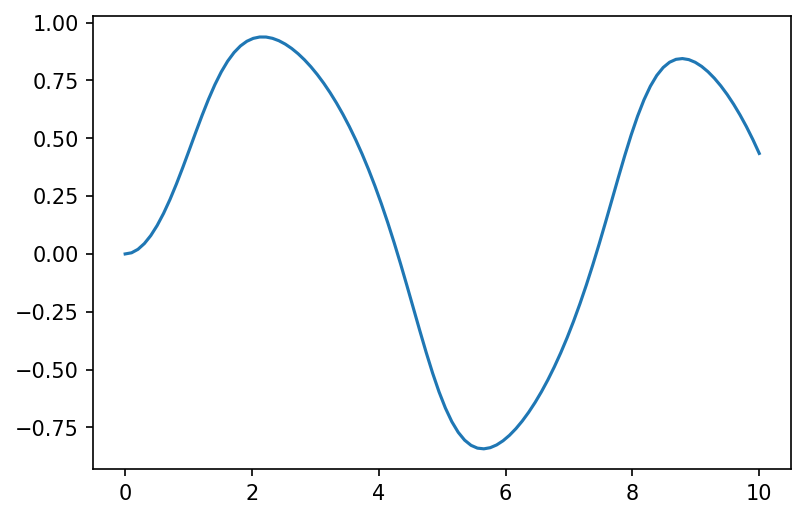

In [89]:
def rk4(f, x0, a, b, N=100):
    ''' Solves an ODE using fourth-order Runge-Kutta 
    f = function in x,t 
    x0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    x = [x0]
    for t in np.arange(0,N-1,1): 
        k1 = h*f(x[t], ts[t]) 
        k2 = h*f(x[t] + k1/2, ts[t] + h/2) 
        k3 = h*f(x[t] + k2/2, ts[t] + h/2) 
        k4 = h*f(x[t] +k3, ts[t] + h) 
        x.append(x[t] + (k1+2*k2+2*k3+k4)/6) 
    plt.figure(dpi=150)
    plt.plot(ts, x)

f = lambda x,t : -x**3 + sin(t) 
rk4(f, 0, 0, 10)

In [101]:
def f(r,t):
    x,y = r[0], r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return np.array([fx,fy],float)


def rk4_sim(f, r0, a, b, N=100):
    ''' Solves coupled ODE using fourth-order Runge-Kutta 
    f = function in r,t 
    r0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    tpoints = np.arange(a,b,h)
    result_list = []
    for i in range(len(r0)):
        result_list.append([])
    r = np.array(r0,float)
    for t in tpoints:
        for i in range(len(r0)):
            result_list[i].append(r[i])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6 
    result_list=np.vstack((tpoints, result_list))
    return result_list

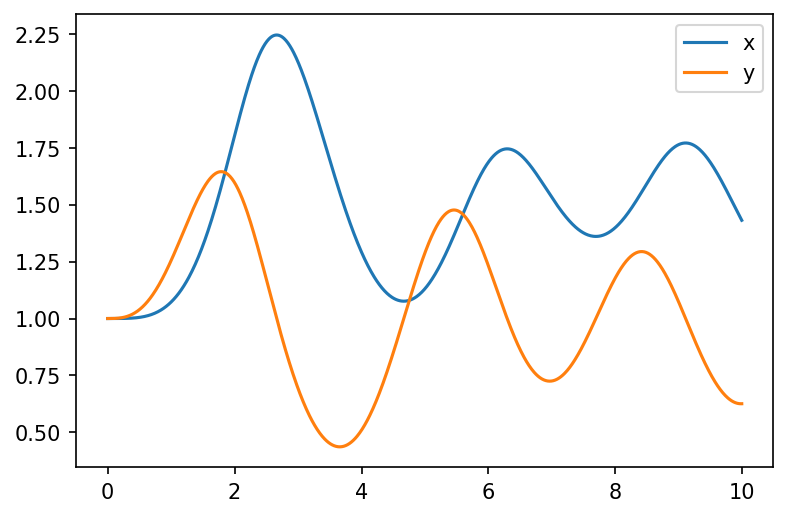

In [107]:
import time
plt.figure(dpi=150)
# start = time.time()
result = rk4_sim(f, [1,1], 0, 10, 1000)
plt.plot(result[0,:], result[1,:], label='x')
plt.plot(result[0,:], result[2,:], label='y')
plt.legend(loc='best')
end=time.time()
# print(end-start, 's')

# Adaptive Runge-Kutta

In [108]:
from scipy.integrate import solve_ivp

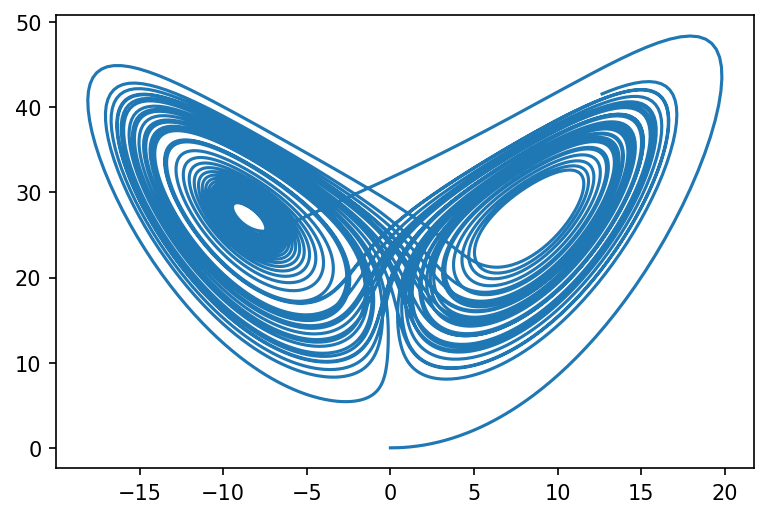

In [109]:
from scipy.integrate import solve_ivp
def f(t,r):
    x,y,z = r[0], r[1], r[2]
    sigma, r, b = 10, 28, 8/3
    fx, fy, fz = sigma*(y-x), r*x - y - x*z, x*y - b*z 
    return np.array([fx,fy,fz],float)  
result = solve_ivp(f, (0,50), [0,1,0], 'RK45', vectorized=True, max_step=0.005)
plt.figure(dpi=150)
plt.plot(result.y[0,], result.y[2,])